<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/ClusterAuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
bn=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Bonus.csv')
bn

,Economy,Speed,Color,Price
0,63.38,35.47,27.11,74.88
1,63.32,33.43,34.71,63.31
2,43.06,22.04,35.99,56.62
3,60.13,34.40,37.12,53.70
4,75.73,22.90,28.03,64.21
5,49.79,44.06,36.22,62.03
6,56.46,43.61,30.65,65.49
7,51.04,21.89,24.68,57.60
8,55.09,40.33,37.08,71.70
9,52.90,15.89,33.48,59.17


In [11]:
bn.corr()

,Economy,Speed,Color,Price
Economy,1.000000,0.771567,-0.354676,0.910017
Speed,0.771567,1.000000,0.022898,0.620146
Color,-0.354676,0.022898,1.000000,-0.618228
Price,0.910017,0.620146,-0.618228,1.000000


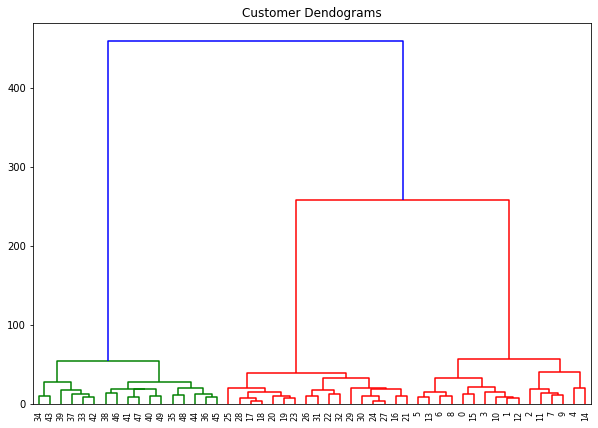

In [8]:
# huge jump in distance is typically what we're interested in
# if we want to argue for a certain number of clusters. 
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(bn, method='ward'))

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cl=cluster.fit_predict(bn)


In [10]:
#Calculate Centroids
cl2=pd.DataFrame(cl)
bon2=pd.concat([bn,cl2],axis=1)
bon2.groupby(0).mean().T


,0,1,2
Economy,59.221250,16.612941,105.279412
Speed,30.140000,27.699412,56.651176
Color,32.311250,84.959412,64.501765
Price,63.508125,12.050588,77.408824


Text(0, 0.5, 'Color')

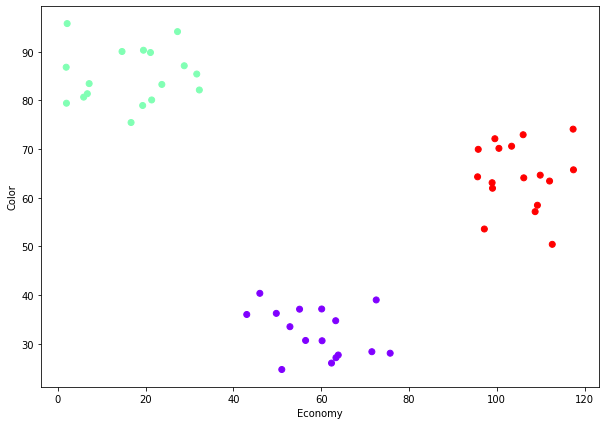

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(bn['Economy'], bn['Color'], c=cluster.labels_, cmap='rainbow')
plt.xlabel('Economy')
plt.ylabel('Color')